In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns  # for nicer plots
sns.set(style="darkgrid")  # default style
from matplotlib import pyplot as plt

### Data Preprocessing & EDA

In [2]:
raw_df = pd.read_csv('spotify_tracks_dataset.csv')

In [3]:
df = raw_df.copy()

# Remove null row
df.dropna(inplace=True)

# Drop Unnamed field and time_signature field
df = df.drop(columns = ["Unnamed: 0", "artists", "album_name","track_name","time_signature"])

# Map explicit field to binary
df['explicit'] = df['explicit'].apply(lambda x: 1 if x == True else 0)

df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113999 non-null  object 
 1   popularity        113999 non-null  int64  
 2   duration_ms       113999 non-null  int64  
 3   explicit          113999 non-null  int64  
 4   danceability      113999 non-null  float64
 5   energy            113999 non-null  float64
 6   key               113999 non-null  int64  
 7   loudness          113999 non-null  float64
 8   mode              113999 non-null  int64  
 9   speechiness       113999 non-null  float64
 10  acousticness      113999 non-null  float64
 11  instrumentalness  113999 non-null  float64
 12  liveness          113999 non-null  float64
 13  valence           113999 non-null  float64
 14  tempo             113999 non-null  float64
 15  track_genre       113999 non-null  object 
dtypes: float64(9), int64(5), 

In [4]:
#Remove rows with multiple genres
duplicates = df[df.duplicated('track_id')]
df = df[df['track_id'].isin(duplicates['track_id']) == False]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73099 entries, 2 to 113999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          73099 non-null  object 
 1   popularity        73099 non-null  int64  
 2   duration_ms       73099 non-null  int64  
 3   explicit          73099 non-null  int64  
 4   danceability      73099 non-null  float64
 5   energy            73099 non-null  float64
 6   key               73099 non-null  int64  
 7   loudness          73099 non-null  float64
 8   mode              73099 non-null  int64  
 9   speechiness       73099 non-null  float64
 10  acousticness      73099 non-null  float64
 11  instrumentalness  73099 non-null  float64
 12  liveness          73099 non-null  float64
 13  valence           73099 non-null  float64
 14  tempo             73099 non-null  float64
 15  track_genre       73099 non-null  object 
dtypes: float64(9), int64(5), object(2)
memory us

In [5]:
df.columns

Index(['track_id', 'popularity', 'duration_ms', 'explicit', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'track_genre'],
      dtype='object')

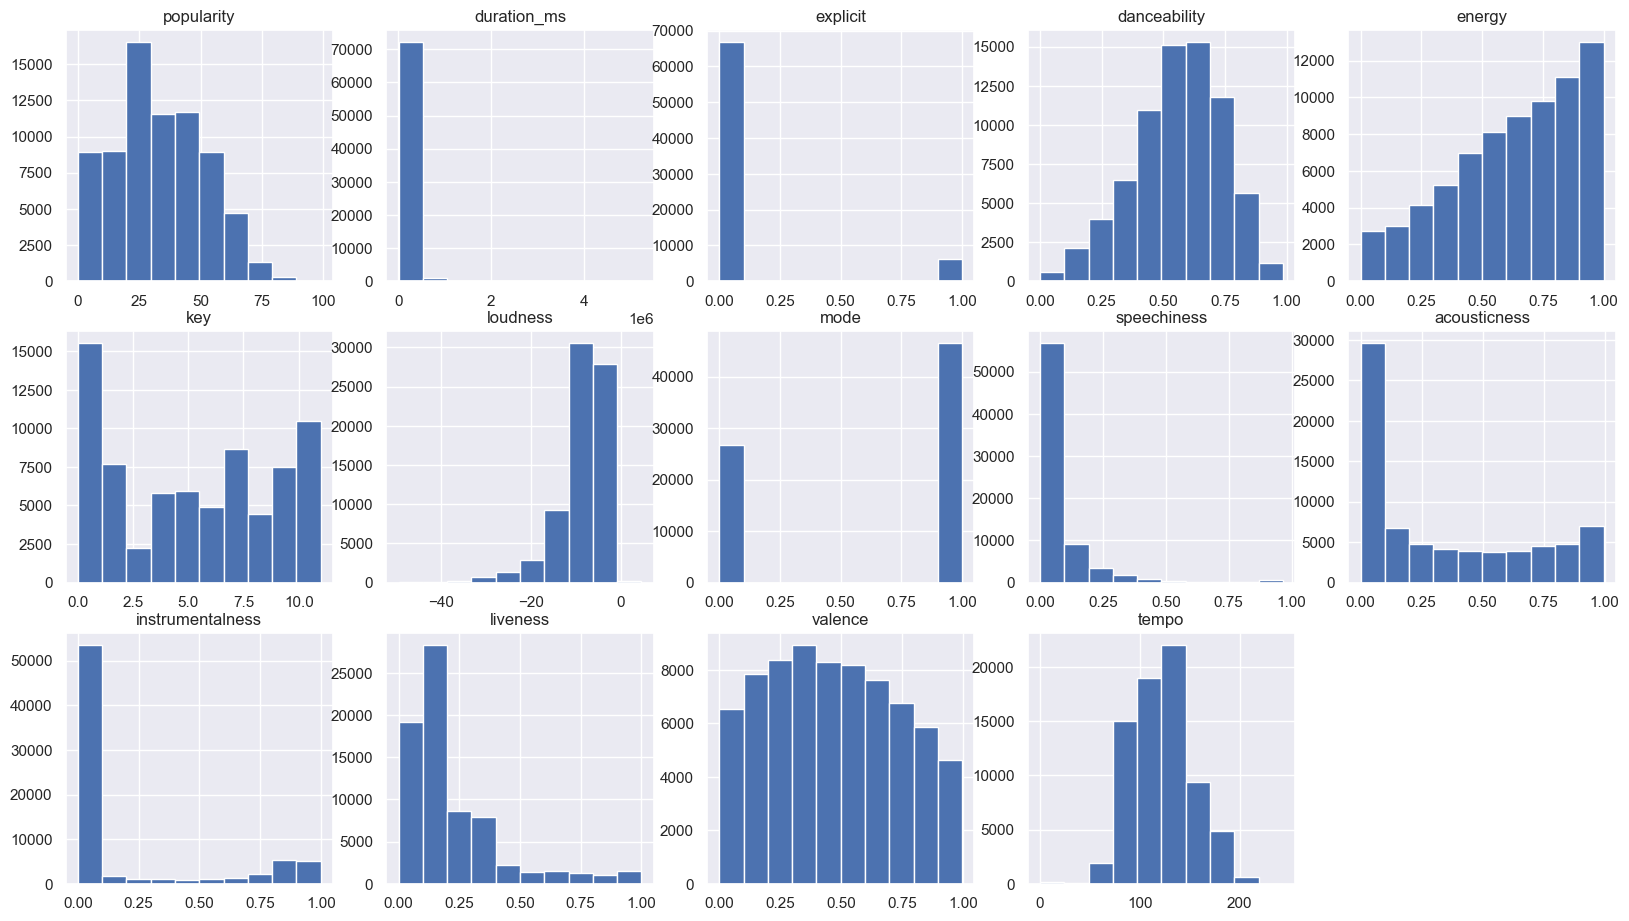

In [6]:
#feature histograms
features = ['popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo']

plt.figure(figsize=(20, 15))
for i in range(len(features)):
  plt.subplot(4, 5, i+1)
  plt.hist(np.array(df[features[i]]))
  plt.title(features[i])
plt.show()

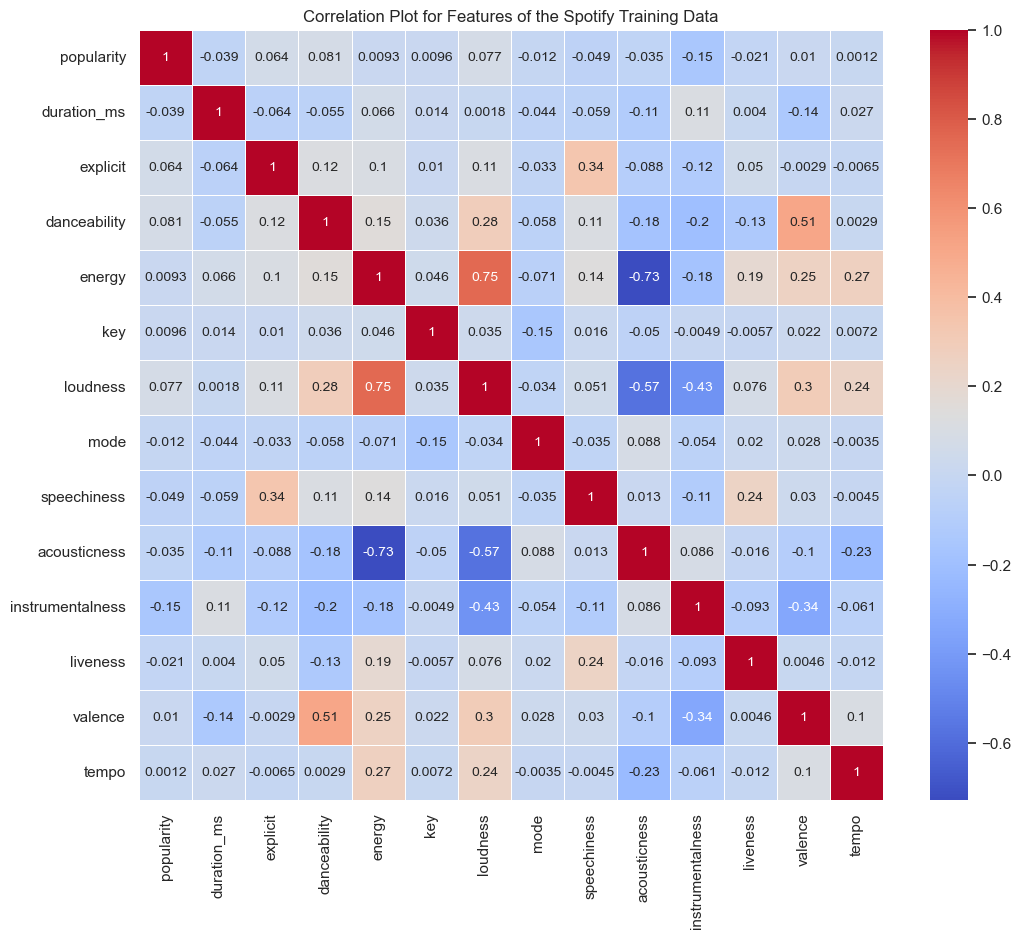

In [7]:
plt.figure(figsize=(12,10))
corr = df[features].corr()
sns.heatmap(corr, annot = True, cmap= 'coolwarm', linewidths=0.5, annot_kws={"size": 10})
plt.title('Correlation Plot for Features of the Spotify Training Data')

plt.show()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73099 entries, 2 to 113999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          73099 non-null  object 
 1   popularity        73099 non-null  int64  
 2   duration_ms       73099 non-null  int64  
 3   explicit          73099 non-null  int64  
 4   danceability      73099 non-null  float64
 5   energy            73099 non-null  float64
 6   key               73099 non-null  int64  
 7   loudness          73099 non-null  float64
 8   mode              73099 non-null  int64  
 9   speechiness       73099 non-null  float64
 10  acousticness      73099 non-null  float64
 11  instrumentalness  73099 non-null  float64
 12  liveness          73099 non-null  float64
 13  valence           73099 non-null  float64
 14  tempo             73099 non-null  float64
 15  track_genre       73099 non-null  object 
dtypes: float64(9), int64(5), object(2)
memory us

In [9]:
# One hot encode key field
df = pd.get_dummies(df, columns=['key'], dtype=int)
df = df.rename(columns={"key_0":"C","key_1":"C#","key_2":"D","key_3":"D#","key_4":"E","key_5":"F",
                        "key_6":"F#","key_7":"G","key_8":"G#","key_9":"A","key_10":"A#","key_11":"B"})

df.head()

,track_id,popularity,duration_ms,explicit,danceability,energy,loudness,mode,speechiness,acousticness,...,D,D#,E,F,F#,G,G#,A,A#,B
2,1iJBSr7s7jYXzM8EGcbK5b,57,210826,0,0.438,0.3590,-9.734,1,0.0557,0.210,...,0,0,0,0,0,0,0,0,0,0
3,6lfxq3CG4xtTiEg7opyCyx,71,201933,0,0.266,0.0596,-18.515,1,0.0363,0.905,...,0,0,0,0,0,0,0,0,0,0
4,5vjLSffimiIP26QG5WcN2K,82,198853,0,0.618,0.4430,-9.681,1,0.0526,0.469,...,1,0,0,0,0,0,0,0,0,0
8,0IktbUcnAGrvD03AWnz3Q8,74,189613,0,0.625,0.4140,-8.700,1,0.0369,0.294,...,0,0,0,0,0,0,0,0,0,0
10,4mzP5mHkRvGxdhdGdAH7EJ,74,244800,0,0.627,0.3630,-8.127,1,0.0291,0.279,...,0,0,0,0,0,0,1,0,0,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73099 entries, 2 to 113999
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          73099 non-null  object 
 1   popularity        73099 non-null  int64  
 2   duration_ms       73099 non-null  int64  
 3   explicit          73099 non-null  int64  
 4   danceability      73099 non-null  float64
 5   energy            73099 non-null  float64
 6   loudness          73099 non-null  float64
 7   mode              73099 non-null  int64  
 8   speechiness       73099 non-null  float64
 9   acousticness      73099 non-null  float64
 10  instrumentalness  73099 non-null  float64
 11  liveness          73099 non-null  float64
 12  valence           73099 non-null  float64
 13  tempo             73099 non-null  float64
 14  track_genre       73099 non-null  object 
 15  C                 73099 non-null  int32  
 16  C#                73099 non-null  int32  
 1

### Randomize

In [11]:
df = df.sample(frac = 1, random_state = 42)
df.head()

,track_id,popularity,duration_ms,explicit,danceability,energy,loudness,mode,speechiness,acousticness,...,D,D#,E,F,F#,G,G#,A,A#,B
41891,2VDLrQrViWwLct8ldoYrdp,21,147469,0,0.334,0.794,-6.109,0,0.0757,0.044700,...,0,0,0,0,0,0,0,0,1,0
10305,53XfDpv76U3BlDXe4JlJ4h,38,391200,0,0.833,0.535,-6.735,1,0.0561,0.002820,...,0,0,0,0,0,0,0,1,0,0
49906,1v6YXPMW3oXItzCKvRgn05,20,155931,0,0.684,0.961,-0.093,0,0.1490,0.139000,...,0,0,1,0,0,0,0,0,0,0
63785,2CAX9dUKArSGw2uPy1sVDJ,33,194393,0,0.626,0.620,-6.739,1,0.0447,0.003120,...,0,0,0,1,0,0,0,0,0,0
32966,4ldtnXwqUmfFGNNxa3Gjba,20,374400,0,0.686,0.488,-8.765,0,0.0350,0.000039,...,0,0,0,0,0,0,0,0,1,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73099 entries, 41891 to 22686
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          73099 non-null  object 
 1   popularity        73099 non-null  int64  
 2   duration_ms       73099 non-null  int64  
 3   explicit          73099 non-null  int64  
 4   danceability      73099 non-null  float64
 5   energy            73099 non-null  float64
 6   loudness          73099 non-null  float64
 7   mode              73099 non-null  int64  
 8   speechiness       73099 non-null  float64
 9   acousticness      73099 non-null  float64
 10  instrumentalness  73099 non-null  float64
 11  liveness          73099 non-null  float64
 12  valence           73099 non-null  float64
 13  tempo             73099 non-null  float64
 14  track_genre       73099 non-null  object 
 15  C                 73099 non-null  int32  
 16  C#                73099 non-null  int32  

### Feature Selection

In [13]:
df.columns

Index(['track_id', 'popularity', 'duration_ms', 'explicit', 'danceability',
       'energy', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'track_genre', 'C',
       'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B'],
      dtype='object')

In [14]:
columns = ['danceability', 'energy', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
           'liveness', 'valence', 'tempo', 'track_genre', 'C', 'C#', 'D', 'D#',
           'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
df = df[columns]
display(df)

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,...,D,D#,E,F,F#,G,G#,A,A#,B
41891,0.334,0.794,-6.109,0,0.0757,0.044700,0.000004,0.1020,0.6420,184.772,...,0,0,0,0,0,0,0,0,1,0
10305,0.833,0.535,-6.735,1,0.0561,0.002820,0.861000,0.1010,0.4210,127.998,...,0,0,0,0,0,0,0,1,0,0
49906,0.684,0.961,-0.093,0,0.1490,0.139000,0.000000,0.1920,0.0463,99.984,...,0,0,1,0,0,0,0,0,0,0
63785,0.626,0.620,-6.739,1,0.0447,0.003120,0.000000,0.6030,0.7530,101.050,...,0,0,0,1,0,0,0,0,0,0
32966,0.686,0.488,-8.765,0,0.0350,0.000039,0.823000,0.8530,0.1720,124.999,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55201,0.482,0.694,-5.368,1,0.0420,0.452000,0.000000,0.1100,0.5730,90.196,...,0,0,0,0,0,0,0,0,0,0
10375,0.574,0.939,-2.464,0,0.0437,0.036600,0.000000,0.3050,0.5530,139.958,...,0,0,0,0,0,0,0,0,1,0
84290,0.641,0.725,-7.376,1,0.0390,0.160000,0.003210,0.6480,0.8080,112.529,...,0,0,0,0,0,1,0,0,0,0
1062,0.483,0.994,-6.676,0,0.0762,0.000444,0.765000,0.0570,0.7020,182.051,...,0,0,1,0,0,0,0,0,0,0


In [15]:
genre_mapping = pd.read_csv('genre_mapping.csv')
genre_mapping_dict = dict(zip(genre_mapping['All Genres'],genre_mapping['Parent']))
print(genre_mapping_dict)

{'acoustic': 'Other', 'afrobeat': 'Other', 'alt-rock': 'Rock', 'alternative': 'Rock', 'ambient': 'Other', 'anime': 'Other', 'black-metal': 'Metal', 'bluegrass': 'Country', 'blues': 'Other', 'brazil': 'Latin', 'breakbeat': 'Electronic', 'british': 'Other', 'cantopop': 'Pop', 'chicago-house': 'Electronic', 'children': 'Other', 'chill': 'Other', 'classical': 'Classical', 'club': 'Electronic', 'comedy': 'Other', 'country': 'Country', 'dance': 'Other', 'dancehall': 'Latin', 'death-metal': 'Metal', 'deep-house': 'Electronic', 'detroit-techno': 'Electronic', 'disco': 'Funk and Disco', 'disney': 'Other', 'drum-and-bass': 'Electronic', 'dub': 'Other', 'dubstep': 'Electronic', 'edm': 'Electronic', 'electro': 'Electronic', 'electronic': 'Electronic', 'emo': 'Rock', 'folk': 'Other', 'forro': 'Latin', 'french': 'Other', 'funk': 'Funk and Disco', 'garage': 'Other', 'german': 'Other', 'gospel': 'Other', 'goth': 'Rock', 'grindcore': 'Rock', 'groove': 'Funk and Disco', 'grunge': 'Rock', 'guitar': 'Othe

In [16]:
##GIVE CREDIT TO KAGGLE HERE
genre_to_category = {
    # EDM
    'edm': 'Electronic Dance Music', 
    'house': 'Electronic Dance Music', 
    'electro': 'Electronic Dance Music', 
    'trance': 'Electronic Dance Music', 
    'techno': 'Electronic Dance Music', 
    'dubstep': 'Electronic Dance Music', 
    'drum-and-bass': 'Electronic Dance Music', 
    'deep-house': 'Electronic Dance Music', 
    'detroit-techno': 'Electronic Dance Music', 
    'minimal-techno': 'Electronic Dance Music', 
    'progressive-house': 'Electronic Dance Music', 
    'breakbeat': 'Electronic Dance Music',
    
    # Rock
    'alt-rock': 'Rock', 
    'rock': 'Rock', 
    'indie': 'Rock', 
    'indie-pop': 'Rock', 
    'punk': 'Rock', 
    'punk-rock': 'Rock', 
    'hard-rock': 'Rock', 
    'metal': 'Rock', 
    'heavy-metal': 'Rock', 
    'black-metal': 'Rock', 
    'death-metal': 'Rock', 
    'grunge': 'Rock',
    
    # Hip-Hop and R&B
    'hip-hop': 'Hip-Hop and R&B', 
    'r-n-b': 'Hip-Hop and R&B', 
    'trap': 'Hip-Hop and R&B',
    
    # Pop
    'pop': 'Pop', 
    'electro-pop': 'Pop', 
    'synth-pop': 'Pop', 
    'k-pop': 'Pop', 
    'pop-film': 'Pop', 
    'power-pop': 'Pop',
    
    # Latin & Reggae/Dancehall
    'latin': 'Latin & Reggae/Dancehall', 
    'reggaeton': 'Latin & Reggae/Dancehall', 
    'salsa': 'Latin & Reggae/Dancehall', 
    'samba': 'Latin & Reggae/Dancehall', 
    'reggae': 'Latin & Reggae/Dancehall', 
    'dancehall': 'Latin & Reggae/Dancehall',
    
    # Funk and Disco
    'funk': 'Funk and Disco', 
    'disco': 'Funk and Disco', 
    'groove': 'Funk and Disco',
}

# Map each track to a category
df['music_category'] = df['track_genre'].apply(lambda x: genre_mapping_dict.get(x, 'Other'))
df['music_category']

41891          Rock
10305    Electronic
49906    Electronic
63785          Rock
32966    Electronic
            ...    
55201         Other
10375    Electronic
84290          Rock
1062          Other
22686         Metal
Name: music_category, Length: 73099, dtype: object

In [17]:
#Trying with dropped other
df = df[df['music_category'] != 'Other']

In [18]:
features = ['danceability', 'energy', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
           'liveness', 'valence', 'tempo', 'C', 'C#', 'D', 'D#',
           'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
label = ['music_category']
X = df[features]
Y = df[label]

In [19]:
Y.value_counts()

music_category 
Electronic         11740
Rock                7040
Latin               6840
Pop                 5635
Metal               3340
Country             2800
Hip-Hop and R&B     2280
Funk and Disco      1653
Classical           1433
Name: count, dtype: int64

In [20]:
#converting Y into label values
Y['music_category'].astype(str)
label_names = list(Y['music_category'].unique())
Y['music_category'] = Y['music_category'].apply(label_names.index)

C:\Users\linni\AppData\Local\Temp\ipykernel_10952\818026736.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y['music_category'] = Y['music_category'].apply(label_names.index)


### Train Test Split

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42) #needs to be 20% of original size

In [22]:
print(len(X_train))

34208


In [23]:
print(len(X_test))

8553


In [24]:
#save everything to csv
X_train.to_csv('data/processed/X_train.csv', index=False)
Y_train.to_csv('data/processed/Y_train.csv', index=False)
X_test.to_csv('data/processed/X_test.csv', index=False)
Y_test.to_csv('data/processed/Y_test.csv', index=False)

### Modeling Next Steps
* Decision Trees
* KNN
* Logistic Regression / NN
